In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from itertools import product
import random

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("../../data/credit-card-full.csv")
X = df[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y = df[['SEX']].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Randomly Sample Hyperparameters
### To undertake a random search, we firstly need to undertake a random sampling of our hyperparameter space.

### In this exercise, you will firstly create some lists of hyperparameters that can be zipped up to a list of lists. Then you will randomly sample hyperparameter combinations in preparation for running a random search.

### You will use just the hyperparameters learning_rate and min_samples_leaf of the GBM algorithm to keep the example illustrative and not overly complicated.

### Instructions
-    Create a list of 200 values for the learning_rate hyperparameter between 0.01 and 1.5 and assign to the list learn_rate_list.
-    Create a list of values between 10 and 40 inclusive for the hyperparameter min_samples_leaf and assign to the list min_samples_list.
-    Combine these lists into a list of lists to sample from.
-    Randomly sample 250 models from these hyperparameter combinations and print the result.

In [12]:
# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01,1.5,200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10,41))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Sample hyperparameter combinations for a random search.
random_combinations_index = np.random.choice(range(0, len(combinations_list)), 250, replace=False)
combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

# Print the result
print(combinations_random_chosen)

[[0.8036683417085427, 33], [0.5490954773869346, 26], [1.1555778894472362, 24], [0.9609045226130652, 34], [1.2379396984924622, 28], [0.7587437185929649, 29], [0.3394472361809045, 22], [0.287035175879397, 35], [0.01, 13], [0.2421105527638191, 15], [1.3652261306532663, 19], [0.26457286432160804, 40], [0.45175879396984925, 18], [0.5940201005025125, 21], [0.9908542713567839, 20], [1.3951758793969848, 27], [1.3951758793969848, 37], [1.4925125628140703, 22], [1.2304522613065327, 11], [1.3427638190954774, 38], [1.095678391959799, 18], [0.7512562814070352, 13], [0.36939698492462314, 30], [0.06989949748743718, 39], [0.15974874371859296, 19], [0.6239698492462311, 26], [1.350251256281407, 29], [0.287035175879397, 17], [0.4592462311557789, 23], [0.10733668341708542, 34], [0.7812060301507537, 12], [1.3876884422110551, 16], [1.0058291457286432, 36], [1.5, 18], [0.7662311557788944, 38], [0.5940201005025125, 37], [0.09984924623115578, 21], [0.24959798994974874, 23], [0.9384422110552764, 11], [1.0732160

## Randomly Search with Random Forest
### To solidify your knowledge of random sampling, let's try a similar exercise but using different hyperparameters and a different algorithm.

### As before, create some lists of hyperparameters that can be zipped up to a list of lists. You will use the hyperparameters criterion, max_depth and max_features of the random forest algorithm. Then you will randomly sample hyperparameter combinations in preparation for running a random search.

### You will use a slightly different package for sampling in this task, random.sample().

### Instructions
-    Create lists of the values 'gini' and 'entropy' for criterion & "auto", "sqrt", "log2", None for max_features.
-    Create a list of values between 3 and 55 inclusive for the hyperparameter max_depth and assign to the list max_depth_list. Remember that range(N,M) will create a list from N to M-1.
-    Combine these lists into a list of lists to sample from using product().
-    Randomly sample 150 models from the combined list and print the result.

In [27]:
# Create lists for criterion and max_features
criterion_list = ['gini', 'entropy']
max_feature_list = ["auto", "sqrt", "log2", None]

# Create a list of values for the max_depth hyperparameter
max_depth_list = list(range(3,56))

# Combination list
combinations_list = [list(x) for x in product(criterion_list, max_feature_list, max_depth_list)]

# Sample hyperparameter combinations for a random search
combinations_random_chosen = random.sample(combinations_list, 150)

# Print the result
print(combinations_random_chosen)

[['gini', 'log2', 13], ['gini', 'sqrt', 22], ['gini', 'sqrt', 46], ['gini', 'log2', 55], ['gini', 'log2', 14], ['gini', 'auto', 10], ['entropy', 'log2', 28], ['gini', 'auto', 7], ['entropy', 'auto', 6], ['gini', None, 41], ['gini', 'sqrt', 19], ['gini', None, 25], ['gini', None, 47], ['entropy', None, 54], ['gini', 'log2', 12], ['entropy', 'sqrt', 17], ['entropy', 'auto', 55], ['entropy', None, 10], ['entropy', 'log2', 8], ['entropy', 'log2', 24], ['gini', 'auto', 26], ['entropy', 'log2', 41], ['entropy', 'log2', 27], ['gini', 'auto', 12], ['gini', None, 22], ['gini', 'sqrt', 47], ['entropy', 'sqrt', 9], ['gini', 'auto', 17], ['entropy', 'log2', 37], ['gini', 'log2', 34], ['gini', 'log2', 40], ['gini', 'auto', 16], ['gini', 'auto', 29], ['gini', 'sqrt', 41], ['gini', None, 31], ['gini', 'sqrt', 53], ['entropy', 'sqrt', 3], ['gini', None, 45], ['gini', None, 32], ['entropy', None, 24], ['gini', 'log2', 46], ['entropy', 'auto', 35], ['gini', 'sqrt', 13], ['entropy', 'log2', 33], ['gini',

## Visualizing a Random Search
### Visualizing the search space of random search allows you to easily see the coverage of this technique and therefore allows you to see the effect of your sampling on the search space.

### In this exercise you will use several different samples of hyperparameter combinations and produce visualizations of the search space.

### The function sample_and_visualize_hyperparameters() takes a single argument (number of combinations to sample) and then randomly samples hyperparameter combinations, just like you did in the last exercise! The function will then visualize the combinations.

### If you want to see the function definition, you can use Python's handy inspect library, like so:

##### - print(inspect.getsource(sample_and_visualize_hyperparameters))

### Instructions
-    Confirm how many possible hyperparameter combinations there are in combinations_list by assigning to the variable number_combs and print this out.
-    Sample and visualize 50, 500 and 1500 combinations. You will use a loop for succinctness. What do you notice about the visualization?
-    Now sample and visualize the entire set of combinations. You have already made a variable to assist with this. What does this look like?

In [18]:
combinations_list = [list(x) for x in product(list(np.linspace(0.01,1.5,200)), list(np.linspace(10,30)))]
x_lims = [0.01, 1.5]
y_lims = [10, 29]

def sample_and_visualize_hyperparameters(n_samples):

  # If asking for all combinations, just return the entire list.
  if n_samples == len(combinations_list):
    combinations_random_chosen = combinations_list
  else:
    combinations_random_chosen = []
    random_combinations_index = np.random.choice(range(0, len(combinations_list)), n_samples, replace=False)
    combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]
    
  # Pull out the X and Y to plot
  rand_y, rand_x = [x[0] for x in combinations_random_chosen], [x[1] for x in combinations_random_chosen]

  # Plot 
  plt.clf() 
  plt.scatter(rand_y, rand_x, c=['blue']*len(combinations_random_chosen))
  plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Random Search Hyperparameters')
  plt.gca().set_xlim(x_lims)
  plt.gca().set_ylim(y_lims)
  plt.show()

10000


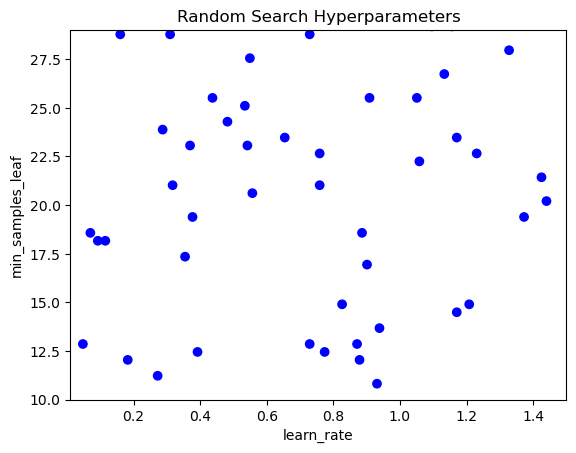

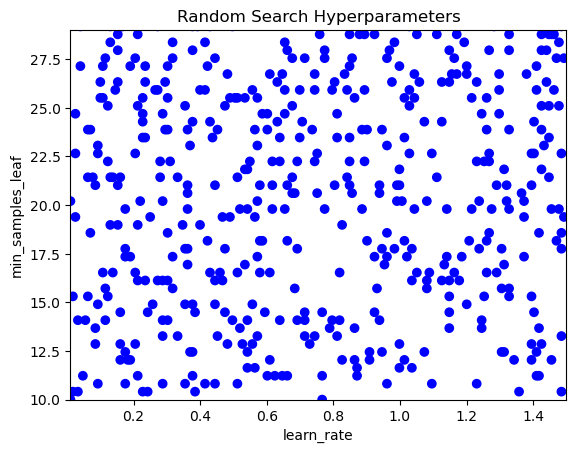

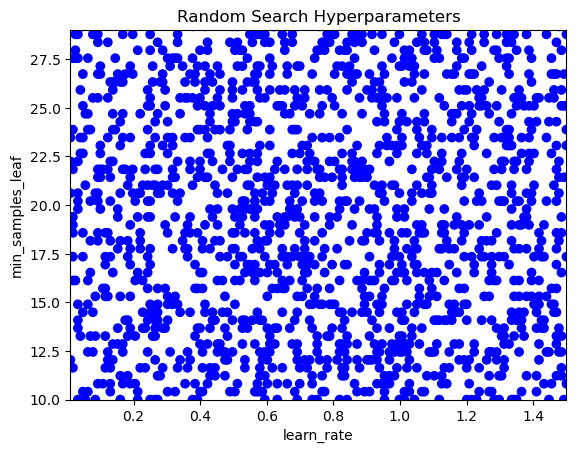

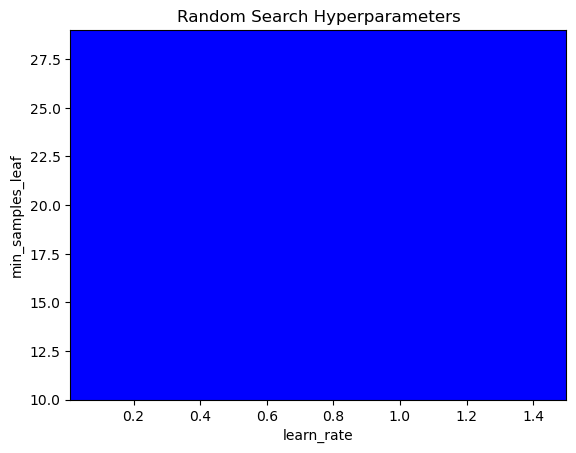

In [19]:
# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# Sample and visualise specified combinations
for x in [50, 500, 1500]:
    sample_and_visualize_hyperparameters(x)
    
# Sample all the hyperparameter combinations & visualise
sample_and_visualize_hyperparameters(number_combs)

## The RandomizedSearchCV Object
### Just like the GridSearchCV library from Scikit Learn, RandomizedSearchCV provides many useful features to assist with efficiently undertaking a random search. You're going to create a RandomizedSearchCV object, making the small adjustment needed from the GridSearchCV object.

### The desired options are:

### A default Gradient Boosting Classifier Estimator
###### - 5-fold cross validation
###### - Use accuracy to score the models
###### - Use 4 cores for processing in parallel
###### - Ensure you refit the best model and return training scores
###### - Randomly sample 10 models
### The hyperparameter grid should be for learning_rate (150 values between 0.1 and 2) and min_samples_leaf (all values between and including 20 and 64).

### You will have available X_train & y_train datasets.

### Instructions
-    Create a parameter grid as specified in the context above.
-    Create a RandomizedSearchCV object as outlined in the context above.
-    Fit the RandomizedSearchCV object to the training data.
-    Print the values chosen by the modeling process for both hyperparameters.

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
# Create the parameter grid
param_grid = {'learning_rate': np.linspace(0.1,2,150), 'min_samples_leaf': list(range(20,65))} 

# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(),
    param_distributions = param_grid,
    n_iter = 10,
    scoring='accuracy', n_jobs=4, cv = 5, refit=True, return_train_score = True)

# Fit to the training data
random_GBM_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_GBM_class.cv_results_['param_learning_rate'])
print(random_GBM_class.cv_results_['param_min_samples_leaf'])

[1.5281879194630874 1.6684563758389261 0.8140939597315436
 1.7704697986577183 1.8469798657718122 1.910738255033557
 1.3751677852348994 1.5026845637583892 1.1583892617449665
 1.859731543624161]
[35 38 28 34 24 35 28 43 49 23]


## RandomSearchCV in Scikit Learn
### Let's practice building a RandomizedSearchCV object using Scikit Learn.

### The hyperparameter grid should be for max_depth (all values between and including 5 and 25) and max_features ('auto' and 'sqrt').

### The desired options for the RandomizedSearchCV object are:

###### - A RandomForestClassifier Estimator with n_estimators of 80.
###### - 3-fold cross validation (cv)
###### - Use roc_auc to score the models
###### - Use 4 cores for processing in parallel (n_jobs)
###### - Ensure you refit the best model and return training scores
###### - Only sample 5 models for efficiency (n_iter)
### X_train & y_train datasets are loaded for you.

### Remember, to extract the chosen hyperparameters these are found in cv_results_ with a column per hyperparameter. For example, the column for the hyperparameter criterion would be param_criterion.

### Instructions
-    Create a hyperparameter grid as specified in the context above.
-    Create a RandomizedSearchCV object as outlined in the context above.
-    Fit the RandomizedSearchCV object to the training data.
-    Index into the cv_results_ object to print the values chosen by the modeling process for both hyperparameters (max_depth and max_features).

In [26]:
# Create the parameter grid
#param_grid = {'max_depth': list(range(5,26)), 'max_features': ['auto' , 'sqrt']} 
param_grid = {'max_depth': list(range(5,26)), 'max_features': ['sqrt']}  # Fixed because the data camp code is old as shit

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator = RandomForestClassifier(n_estimators=80),
    param_distributions = param_grid, n_iter = 5,
    scoring='roc_auc', n_jobs=4, cv = 3, refit=True, return_train_score = True)

# Fit to the training data
random_rf_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])

[19 8 7 21 23]
['sqrt' 'sqrt' 'sqrt' 'sqrt' 'sqrt']


## Grid and Random Search Side by Side
### Visualizing the search space of random and grid search together allows you to easily see the coverage that each technique has and therefore brings to life their specific advantages and disadvantages.

### In this exercise, you will sample hyperparameter combinations in a grid search way as well as a random search way, then plot these to see the difference.

### You will have available:

#### - combinations_list which is a list of combinations of learn_rate and min_samples_leaf for this algorithm
#### - The function visualize_search() which will make your hyperparameter combinations into X and Y coordinates and plot both grid and random search combinations on the same graph. It takes as input two lists of hyperparameter combinations.
### If you wish to view the visualize_search() function definition, you can run this code:

<code>
import inspect
print(inspect.getsource(visualize_search))
</code>

### Instructions 1/4
-    Sample (by slicing) 300 hyperparameter combinations for a grid search from combinations_list into two lists and print the result.

In [33]:
combinations_list = combinations_list = [list(x) for x in product(list(np.linspace(0.01,1.5,200)), list(np.linspace(10,30)))]

In [34]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Print result
print(grid_combinations_chosen)

[[0.01, 10.0], [0.01, 10.408163265306122], [0.01, 10.816326530612244], [0.01, 11.224489795918368], [0.01, 11.63265306122449], [0.01, 12.040816326530612], [0.01, 12.448979591836736], [0.01, 12.857142857142858], [0.01, 13.26530612244898], [0.01, 13.673469387755102], [0.01, 14.081632653061224], [0.01, 14.489795918367347], [0.01, 14.89795918367347], [0.01, 15.306122448979592], [0.01, 15.714285714285715], [0.01, 16.122448979591837], [0.01, 16.53061224489796], [0.01, 16.93877551020408], [0.01, 17.346938775510203], [0.01, 17.755102040816325], [0.01, 18.163265306122447], [0.01, 18.57142857142857], [0.01, 18.979591836734695], [0.01, 19.387755102040817], [0.01, 19.79591836734694], [0.01, 20.20408163265306], [0.01, 20.612244897959183], [0.01, 21.02040816326531], [0.01, 21.42857142857143], [0.01, 21.836734693877553], [0.01, 22.244897959183675], [0.01, 22.653061224489797], [0.01, 23.06122448979592], [0.01, 23.46938775510204], [0.01, 23.877551020408163], [0.01, 24.285714285714285], [0.01, 24.6938775

### Instructions 2/4
-    Let's randomly sample too. Create a list of every index in combinations_list to sample from using range()
-    Use np.random.choice() to sample 300 combinations. The first two arguments are a list to sample from and the number of samples.

In [35]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0,len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

### Instructions 3/4
-    Now use the list of random indexes to index into combinations_list using a list comprehension.

In [36]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0,len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

### Instructions 4/4
-    Use the provided visualize_search() function to visualize the two sampling methodologies. The first argument is your grid combinations, the second argument is the random combinations you created.

In [37]:
def visualize_search(grid_combinations_chosen, random_combinations_chosen):
  grid_y, grid_x = [x[0] for x in grid_combinations_chosen], [x[1] for x in grid_combinations_chosen]
  rand_y, rand_x = [x[0] for x in random_combinations_chosen], [x[1] for x in random_combinations_chosen]

  # Plot all together
  plt.scatter(grid_y + rand_y, grid_x + rand_x, c=['red']*300 + ['blue']*300)
  plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Grid and Random Search Hyperparameters')
  plt.gca().set_xlim(x_lims)
  plt.gca().set_ylim(y_lims)
  plt.show()

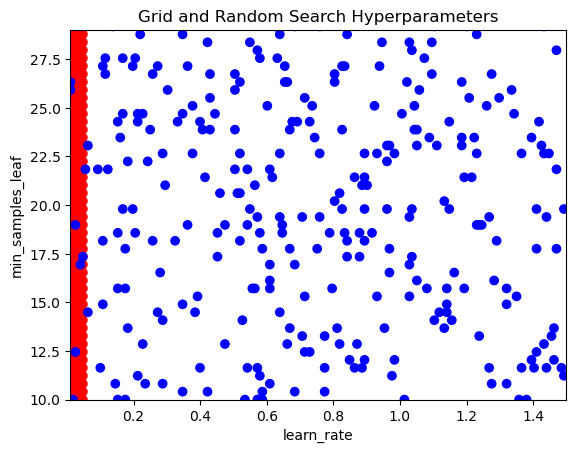

In [38]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0,len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

# Call the function to produce the visualization
visualize_search(grid_combinations_chosen, random_combinations_chosen)